
## Projeto - Análise Exploratória em Conjunto de Dados do Kaggle

Essa dataset é referente a venda de veiculos.

Foi realizado a analise exploratorio dos dados com o intuito de verificar alguns pontos conforme a seguir:

Distribuição de Veículos com base no Ano de Registro;

Variação da faixa de preço pelo tipo de veículo;

Total de veículos à venda conforme o tipo de veículo;

Top 20 das Marcas com mais veiculos a venda;

Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio;

Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio;

Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio;

Média de preço por marca e veículo.



In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# importando o dataset
df = pd.read_csv("dataset/autos.csv")

In [3]:
# verificando as 05 primeiras linhas do dataset

df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [4]:
df.yearOfRegistration.min()

1910

In [5]:
df.shape[0]

313687

In [6]:
# verificando o tamanho do dataset

print(f'A base de dados contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

A base de dados contém 313687 linhas e 27 colunas.


In [7]:
# verificando o tipo de dados do dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [8]:
# resumo estatistico do dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,313687.0,3902.961863,4168.150636,0.0,999.0,2490.0,5400.0,28800.0
yearOfRegistration,313687.0,2001.909231,6.803211,1910.0,1998.0,2002.0,2006.0,2016.0
powerPS,313687.0,109.564250,191.741685,0.0,68.0,104.0,140.0,20000.0
kilometer,313687.0,131435.778340,34963.149957,5000.0,125000.0,150000.0,150000.0,150000.0
postalCode,313687.0,50349.563597,25765.545682,1067.0,29640.0,49205.0,70794.0,99998.0
yearOfCreation,313687.0,2015.999930,0.008374,2015.0,2016.0,2016.0,2016.0,2016.0
yearCrawled,313687.0,2016.000000,0.000000,2016.0,2016.0,2016.0,2016.0,2016.0
NoOfDaysOnline,313687.0,8.543274,8.511917,0.0,2.0,6.0,13.0,384.0
NoOfHrsOnline,313687.0,11.834207,6.504730,0.0,7.0,12.0,17.0,23.0
yearsOld,313687.0,14.090769,6.803211,0.0,10.0,14.0,18.0,106.0


In [9]:
# verificando valores nulos

df.isnull().sum().sort_values(ascending=[False])


fuelType               189
brand                    0
yearsOld                 0
NoOfHrsOnline            0
NoOfDaysOnline           0
monthCrawled             0
monthOfCreation          0
yearCrawled              0
yearOfCreation           0
lastSeen                 0
postalCode               0
dateCreated              0
notRepairedDamage        0
dateCrawled              0
name                     0
monthOfRegistration      0
kilometer                0
model                    0
powerPS                  0
gearbox                  0
yearOfRegistration       0
vehicleType              0
abtest                   0
price                    0
offerType                0
seller                   0
monthsOld                0
dtype: int64

In [10]:
# representatividade de valores nulos

round(df.isnull().sum().sort_values(ascending=[False]) / df.shape[0] * 100,4)


fuelType               0.0603
brand                  0.0000
yearsOld               0.0000
NoOfHrsOnline          0.0000
NoOfDaysOnline         0.0000
monthCrawled           0.0000
monthOfCreation        0.0000
yearCrawled            0.0000
yearOfCreation         0.0000
lastSeen               0.0000
postalCode             0.0000
dateCreated            0.0000
notRepairedDamage      0.0000
dateCrawled            0.0000
name                   0.0000
monthOfRegistration    0.0000
kilometer              0.0000
model                  0.0000
powerPS                0.0000
gearbox                0.0000
yearOfRegistration     0.0000
vehicleType            0.0000
abtest                 0.0000
price                  0.0000
offerType              0.0000
seller                 0.0000
monthsOld              0.0000
dtype: float64

In [11]:
# apagando os valores nulos 

df_analise = df.copy()

df_analise.dropna(inplace=True)

In [12]:
# verificando valores nulos

df_analise.isnull().sum().sort_values(ascending=[False])


dateCrawled            0
brand                  0
yearsOld               0
NoOfHrsOnline          0
NoOfDaysOnline         0
monthCrawled           0
monthOfCreation        0
yearCrawled            0
yearOfCreation         0
lastSeen               0
postalCode             0
dateCreated            0
notRepairedDamage      0
fuelType               0
name                   0
monthOfRegistration    0
kilometer              0
model                  0
powerPS                0
gearbox                0
yearOfRegistration     0
vehicleType            0
abtest                 0
price                  0
offerType              0
seller                 0
monthsOld              0
dtype: int64

In [13]:

# convertendo as colunas de data do formato string para datetime64[ns]

df_analise['dateCrawled'] = df_analise['dateCrawled'].astype('datetime64[ns]')
df_analise['dateCreated'] = df_analise['dateCreated'].astype('datetime64[ns]')
df_analise['lastSeen'] = df_analise['lastSeen'].astype('datetime64[ns]')

In [14]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313498 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          313498 non-null  datetime64[ns]
 1   name                 313498 non-null  object        
 2   seller               313498 non-null  object        
 3   offerType            313498 non-null  object        
 4   price                313498 non-null  int64         
 5   abtest               313498 non-null  object        
 6   vehicleType          313498 non-null  object        
 7   yearOfRegistration   313498 non-null  int64         
 8   gearbox              313498 non-null  object        
 9   powerPS              313498 non-null  int64         
 10  model                313498 non-null  object        
 11  kilometer            313498 non-null  int64         
 12  monthOfRegistration  313498 non-null  object        
 13  fuelType      


# Distribuição de Veículos com base no Ano de Registro


Conforme mostra o histograma os registros estão concentrados a partir de 1980 sendo o por volta dos anos 2000 a maior frequência.

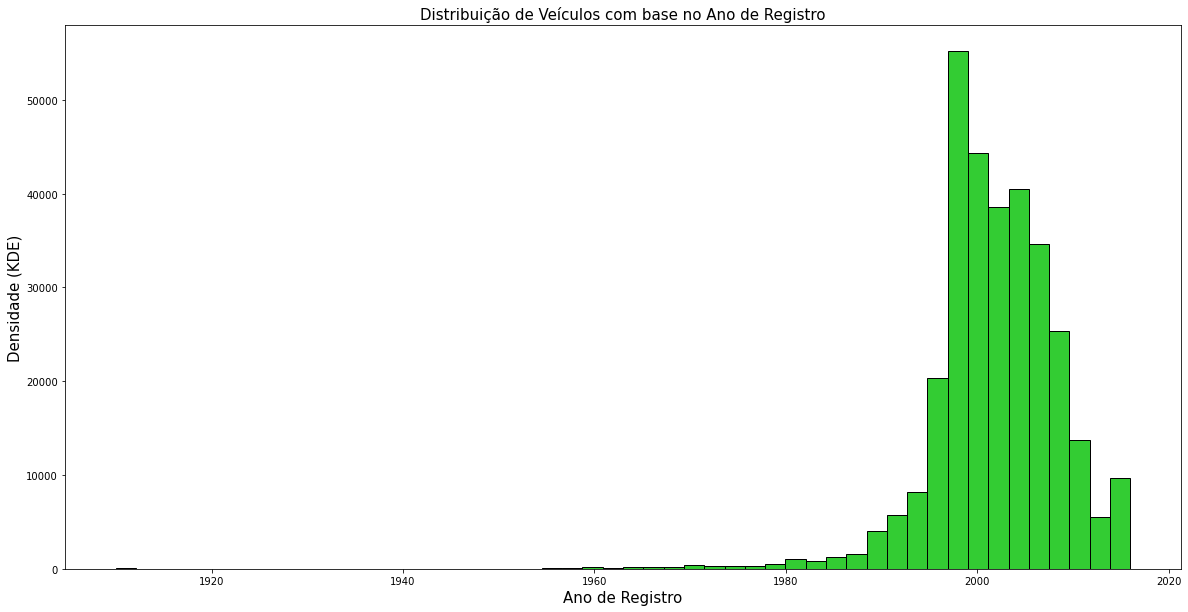

In [15]:
plt.figure(figsize=(20,10))
plt.hist(data=df_analise,x="yearOfRegistration", color="#33cc33",bins=50,edgecolor='black')
plt.title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)

plt.show()


## Variação da faixa de preço pelo tipo de veículo

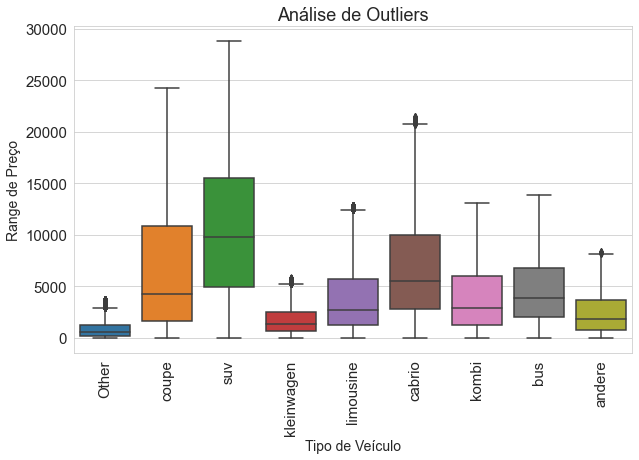

In [16]:
# Crie um Boxplot para avaliar os outliers
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="vehicleType", y="price", data=df)
plt.title("Análise de Outliers",fontsize=18)
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Range de Preço",fontdict= {'size':14})
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation='vertical')
plt.show()

## Contagem total de veículos à venda conforme o tipo de veículo

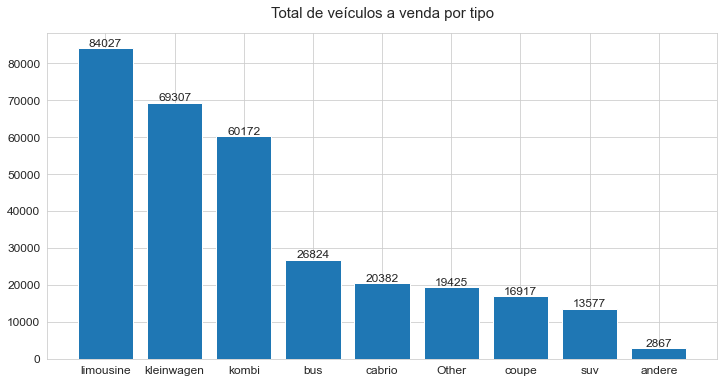

In [17]:
x = df_analise['vehicleType'].value_counts()
figure, ax = plt.subplots(figsize=(12, 6))
x = plt.bar(x.index,x.values)
ax.set_title("Total de veículos a venda por tipo",fontsize=(15),pad=15)
ax.bar_label(x,fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [18]:
# sns.set_style("white")
# g = sns.catplot(x="vehicleType", data=df, kind="count", palette="BuPu", height=6, aspect=1.5)
# g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
# g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
# g.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo",fontdict= {'size':18})
# # to get the counts on the top heads of the bar
# for p in g.ax.patches:
#     g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

## Número de veículos pertencentes a cada marca

Top 20

In [19]:
graph = df_analise.pivot_table(index='brand',values='vehicleType',aggfunc='count').sort_values(by='vehicleType',ascending=False)[:20]

In [20]:
graph

,vehicleType
brand,
volkswagen,66957
opel,36146
bmw,32624
mercedes_benz,28680
audi,25211
ford,22718
renault,16384
peugeot,10255
fiat,8360


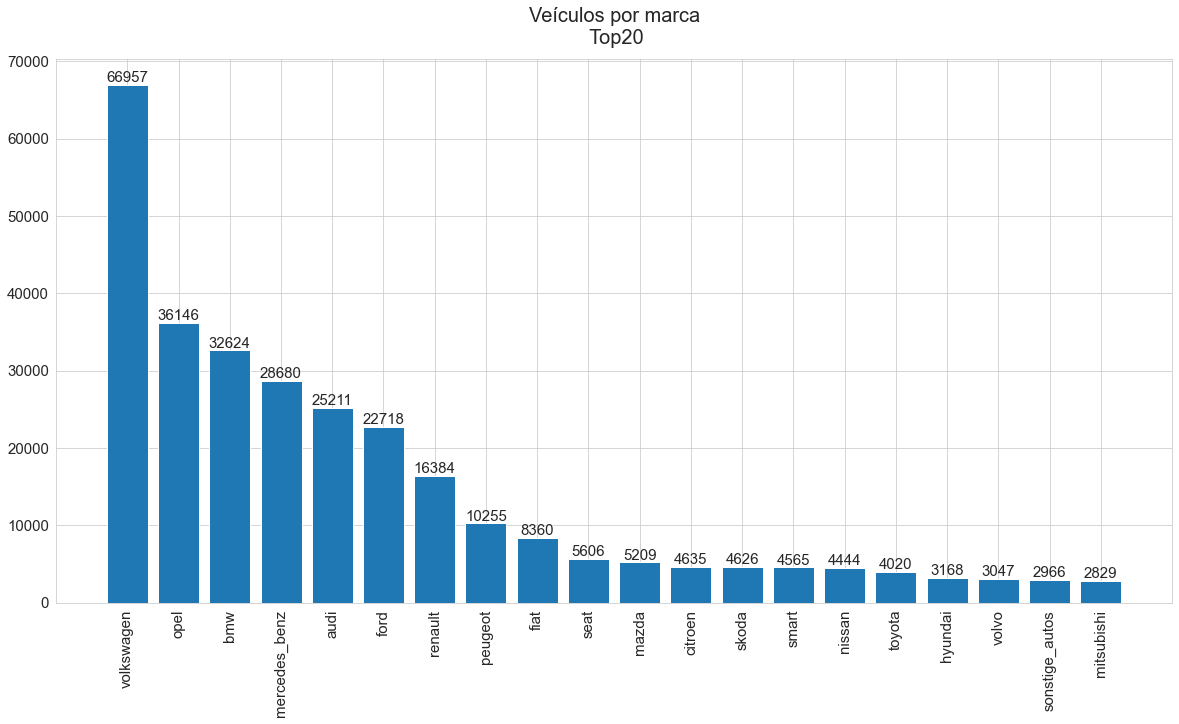

In [21]:

figure, ax = plt.subplots(figsize=(20, 10))
x = plt.bar(graph.index,graph['vehicleType'])
ax.set_title("Veículos por marca\n Top20",fontsize=(20),pad=15)
ax.bar_label(x,fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation='vertical')
plt.show()



## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

In [22]:
x = df_analise.pivot_table(index=['vehicleType','gearbox'],values='price',aggfunc='mean')


In [23]:
graph = x.reset_index()
graph

,vehicleType,gearbox,price
0,Other,Unspecified,638.381413
1,Other,automatik,1217.839072
2,Other,manuell,966.619912
3,andere,Unspecified,1308.110048
4,andere,automatik,2931.778689
5,andere,manuell,2462.339685
6,bus,Unspecified,3488.363519
7,bus,automatik,5720.083560
8,bus,manuell,4548.090227
9,cabrio,Unspecified,4756.997076


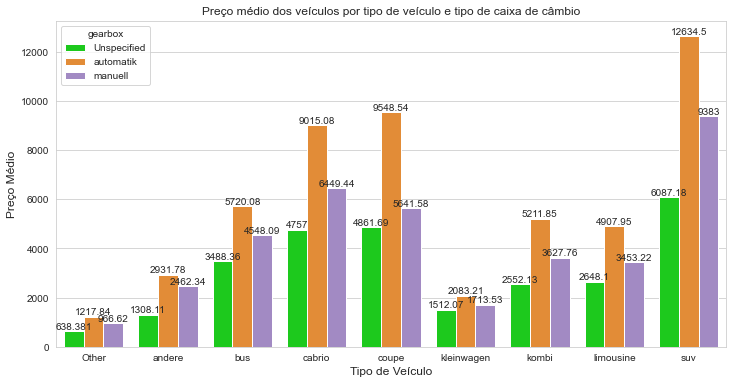

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
colors = ["#00e600", "#ff8c1a","#a180cc"]
ax = sns.barplot(data=graph, x='vehicleType', y='price', hue='gearbox', palette=colors)
ax.set_title("Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()


## Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

In [25]:
x = df_analise.pivot_table(index=['fuelType','gearbox'],values='price',aggfunc='mean')
graph = x.reset_index()
graph

,fuelType,gearbox,price
0,Cng,Unspecified,2646.307692
1,Cng,automatik,5110.156250
2,Cng,manuell,4112.617711
3,Diesel,Unspecified,3231.736023
4,Diesel,automatik,7998.659897
5,Diesel,manuell,5221.182161
6,Electric,Unspecified,2507.500000
7,Electric,automatik,5862.105263
8,Electric,manuell,2136.363636
9,Gasoline,Unspecified,1909.750207


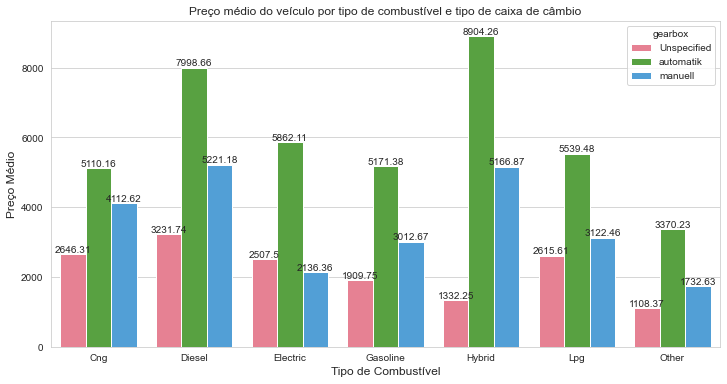

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=graph, x='fuelType', y='price', hue='gearbox', palette='husl')
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

## Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

In [27]:
x = df_analise.pivot_table(index=['vehicleType','gearbox'],values='powerPS',aggfunc='mean')
graph = x.reset_index()
graph

,vehicleType,gearbox,powerPS
0,Other,Unspecified,16.445443
1,Other,automatik,81.834581
2,Other,manuell,70.753822
3,andere,Unspecified,88.114833
4,andere,automatik,80.479508
5,andere,manuell,92.962717
6,bus,Unspecified,45.793014
7,bus,automatik,132.606968
8,bus,manuell,108.249408
9,cabrio,Unspecified,61.817251


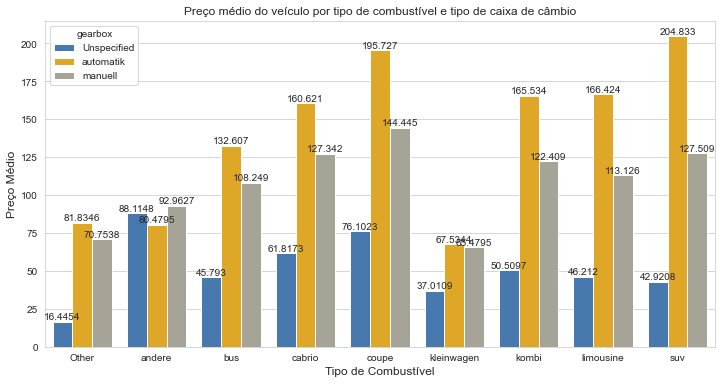

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
ax = sns.barplot(data=graph, x='vehicleType', y='powerPS', hue='gearbox')
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

## Média de preço por marca e veículo

##### Top 20 em média de preços por marca e tipo de veículo

In [29]:
media = df_analise.groupby(['brand','vehicleType']).agg({'price':'mean'}).round(2)

media = media.reset_index()

media.rename(columns={'price':'price_mean'},inplace=True)

media.sort_values(by='price_mean',ascending=False)[:20]

,brand,vehicleType,price_mean
16,audi,suv,18739.30
178,mini,suv,18268.12
115,jaguar,coupe,15243.55
221,porsche,suv,15177.37
114,jaguar,cabrio,15076.60
316,trabant,suv,14500.00
264,skoda,suv,14389.94
332,volvo,suv,14081.24
325,volkswagen,suv,13946.28
217,porsche,cabrio,13309.73


In [30]:
tri = media.pivot("brand","vehicleType", "price_mean")

In [31]:
tri

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669.81,962.50,NaN,7035.73,5265.46,1867.87,3312.97,2600.24,0.00
audi,1012.60,2685.31,3485.00,9655.29,11242.33,2585.01,5442.98,3829.82,18739.30
bmw,896.75,1720.39,4064.00,8615.36,6376.00,1580.05,5030.38,4838.19,12868.14
chevrolet,1250.14,3059.59,5188.01,10590.29,9991.76,2588.88,4143.61,4944.03,9597.64
chrysler,915.70,2919.71,2395.08,4160.72,8194.00,1666.44,3930.57,3191.59,5888.39
citroen,907.06,2261.81,4036.49,4536.41,2695.55,2276.11,3101.82,3379.15,10810.54
dacia,1674.88,3560.00,8370.73,NaN,NaN,3276.29,4166.64,3260.58,9761.97
daewoo,664.20,993.80,1262.78,900.00,428.62,1110.32,816.34,989.49,1900.00
daihatsu,614.68,1172.73,1201.50,7761.00,NaN,1402.86,3420.29,3329.54,2066.92


In [32]:
tri.fillna(0,inplace=True)

In [33]:
tri

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669.81,962.50,0.00,7035.73,5265.46,1867.87,3312.97,2600.24,0.00
audi,1012.60,2685.31,3485.00,9655.29,11242.33,2585.01,5442.98,3829.82,18739.30
bmw,896.75,1720.39,4064.00,8615.36,6376.00,1580.05,5030.38,4838.19,12868.14
chevrolet,1250.14,3059.59,5188.01,10590.29,9991.76,2588.88,4143.61,4944.03,9597.64
chrysler,915.70,2919.71,2395.08,4160.72,8194.00,1666.44,3930.57,3191.59,5888.39
citroen,907.06,2261.81,4036.49,4536.41,2695.55,2276.11,3101.82,3379.15,10810.54
dacia,1674.88,3560.00,8370.73,0.00,0.00,3276.29,4166.64,3260.58,9761.97
daewoo,664.20,993.80,1262.78,900.00,428.62,1110.32,816.34,989.49,1900.00
daihatsu,614.68,1172.73,1201.50,7761.00,0.00,1402.86,3420.29,3329.54,2066.92


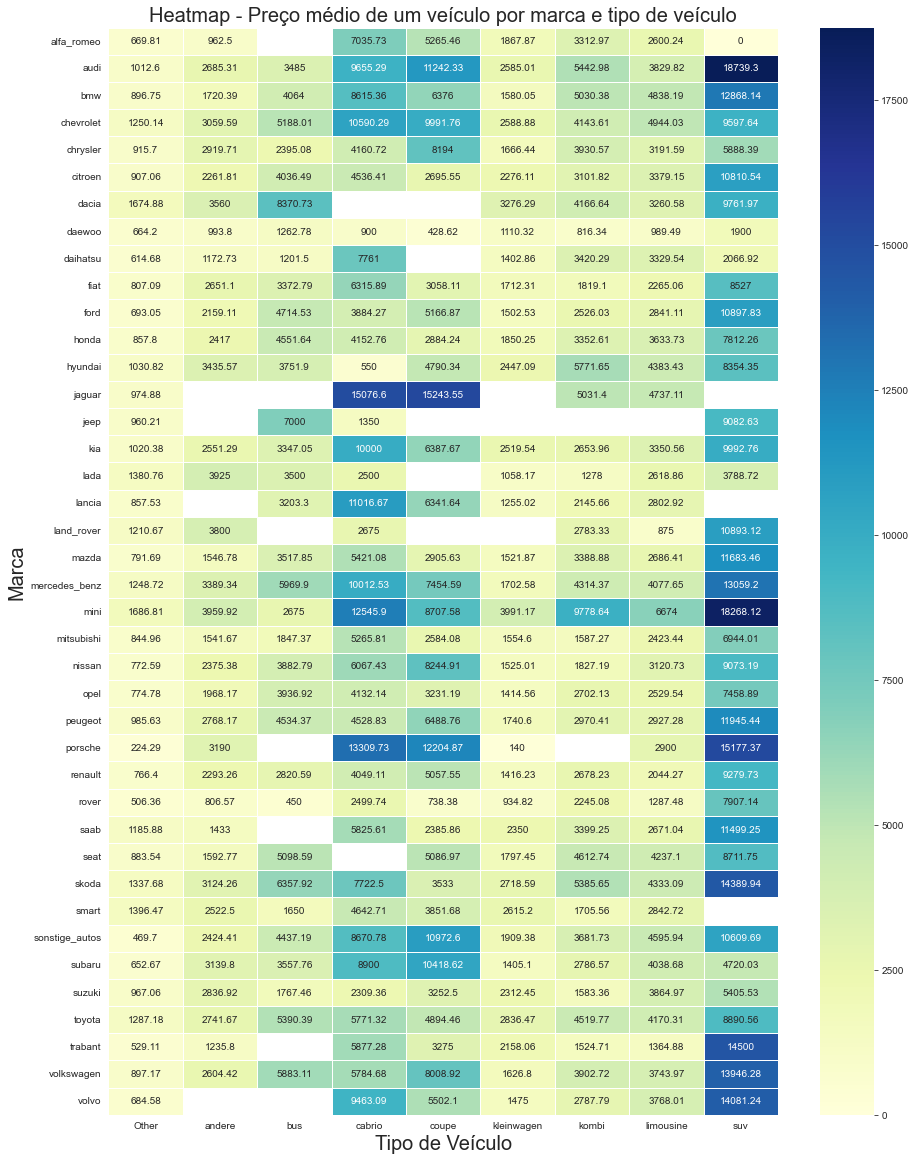

In [34]:
tri = media.pivot("brand","vehicleType", "price_mean")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax,fmt=".10g")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()